In [7]:
from SunImports import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


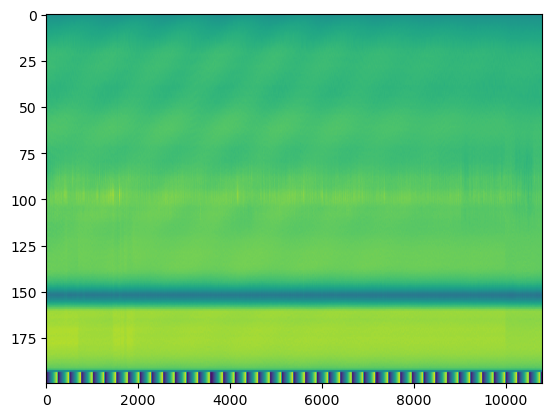

In [13]:
files = ['Erste Daten Sonne 10/ETH_20240110_101501_01.fit', 
         'Erste Daten Sonne 10/ETH_20240110_103001_01.fit', 
         'Erste Daten Sonne 10/ETH_20240110_104501_01.fit']
data, t, freq = glue_together(files)
plt.imshow(data, aspect='auto')

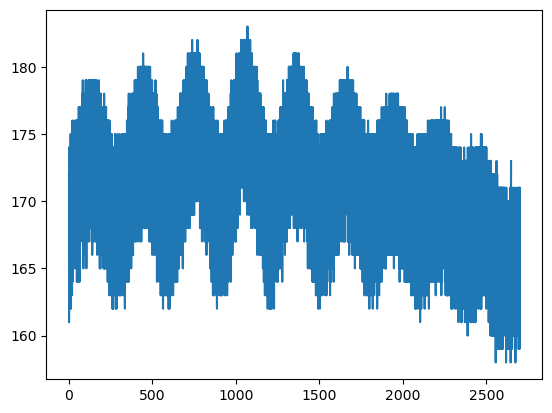

In [14]:
plt.plot(t, data[50, :])